In [1]:
import os
import json
import numpy as np
import pandas as pd

In [2]:
folders = ['custom_license','noncomm_use_subset','biorxiv_medrxiv','comm_use_subset']

In [3]:
path_papers = []
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      path_papers.append(os.path.join(root, name))
#update to include only files in folders
path_papers = [path for path in path_papers if any(x in path.split('/') for x in folders)]
#update to remove "."
path_papers = [paper[1:] for paper in path_papers]

In [4]:
#create dictionary for paths of papers by folder
dict_paper_paths ={}
for paper in path_papers:
    split_path = paper.split("/")
    #create key
    key = split_path[1]
    if key not in dict_paper_paths.keys():
        dict_paper_paths[key] = [paper]
    else:
        value = dict_paper_paths[key]
        value.append(paper)


In [5]:
for i in dict_paper_paths.keys():
    print('Papers for ',i, 'is ',len(dict_paper_paths[i]))

Papers for  custom_license is  16959
Papers for  noncomm_use_subset is  2353
Papers for  biorxiv_medrxiv is  885
Papers for  comm_use_subset is  9118


In [6]:
fname = os.getcwd() + dict_paper_paths['comm_use_subset'][0]
fname

'/Users/janmichaelaustria/Google Drive/UNH Spring/ML_Part2/Covid_19/comm_use_subset/5e0c586f047ff909c8ed3fe171c8975a90608d08.json'

In [7]:
with open(fname) as f:
  data = json.load(f)

data.keys()

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])

In [8]:
def pull_paper_id(file):
    #get the paper id from json file
    return(file['paper_id'])

def pull_title(file):
    #get title from 
    return(file['metadata']['title'])

def pull_authors(file):
    #returns string of authors seperated by ;
    #access list of author dictionaries
    list_author_dicts = file['metadata']['authors']
    #traverse list
    authors = []
    for i in range(0,len(list_author_dicts)):
        first_name,last_name = list_author_dicts[i]['first'], list_author_dicts[i]['last']
        #concat fist and last
        author_name = first_name + " " + last_name
        authors.append(author_name)
    return(authors)

def pull_abstracts(file):
    #pull abstracts
    abstract_texts = []
    if len(file['abstract']) == 0:
        return(np.nan)
    else:
        abstracts = file['abstract']
        for i in range(0,len(abstracts)):
            if 'text' in abstracts[i].keys():
                text_element = abstracts[i]['text']
                abstract_texts.append(text_element)
        return(abstract_texts)

def pull_texts(file):
    #pull all text files from body
    body_text = file['body_text']
    #travese list
    #store texts
    texts = []
    for i in range(0,len(body_text)):
        if 'text' in body_text[i].keys():
            #pull text element
            text_element = body_text[i]['text']
            texts.append(text_element)
        else:
            pass
    #add in text from back_matter
    back_matter =  file['back_matter']
    for i in range(0,len(back_matter)):
        if 'text' in back_matter[i].keys():
            text_element = back_matter[i]['text']
            texts.append(text_element)
        else:
            pass
                
    return(texts)

def pull_citations(file):
    #in case i want acess to this
    #citation will be indicated by title and year, that should be enough for a lookup
    citations = []
    bib_entries = file['bib_entries']
    for i in bib_entries.keys():
        ith_bib_entry = bib_entries[i]
        title, year = ith_bib_entry['title'], ith_bib_entry['year']
        citations.append((title,year))
    return(citations) 

All functions work!

## Apply functions to all json files

In [9]:
paper_types = []
paper_ids = []
paper_titles = []
paper_authors = []
paper_abstracts = []
paper_texts = []
paper_citations = []

for paper_type in dict_paper_paths.keys():
    #access list file paths
    list_paths = dict_paper_paths[paper_type]
    #move along list paths
    for i in range(0,len(list_paths)):
        #create filename to read
        fname = os.getcwd() + list_paths[i]
        #oad into json
        with open(fname) as f:
            data = json.load(f)
        #go into json, grabbing what i need
        ID, title,authors, abstract,text,citations = pull_paper_id(data), pull_title(data),pull_authors(data),pull_abstracts(data),pull_texts(data),pull_citations(data)   
        #append accordingly
        paper_types.append(paper_type)
        paper_ids.append(ID)
        paper_titles.append(title)
        paper_authors.append(authors)
        paper_abstracts.append(abstract)
        paper_texts.append(text)
        paper_citations.append(citations)
        

In [10]:
len(paper_texts)

29315

## Put all into DataFrame

In [11]:
papers = pd.DataFrame()
papers['Library']  = paper_types
papers['ID'] = paper_ids
papers['Titles'] = paper_titles
papers['Authors'] = paper_authors
papers['Abstract'] = paper_abstracts
papers['Text'] = paper_texts
papers['Citations'] = paper_citations

In [12]:
papers.shape

(29315, 7)

In [13]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29315 entries, 0 to 29314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Library    29315 non-null  object
 1   ID         29315 non-null  object
 2   Titles     29315 non-null  object
 3   Authors    29315 non-null  object
 4   Abstract   21264 non-null  object
 5   Text       29315 non-null  object
 6   Citations  29315 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [14]:
papers.head()

,Library,ID,Titles,Authors,Abstract,Text,Citations
0,custom_license,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,Evolutionary Medicine IV. Evolution and Emerge...,[S Scarpino],NaN,[The evolutionary history of humans is charact...,[(Rapid evolutionary dynamics and disease thre...
1,custom_license,6599ebbef3d868afac9daa4f80fa075675cf03bc,International aviation emissions to 2025: Can ...,"[Andrew Macintosh, Lailey Wallace]","[International aviation is growing rapidly, re...","[Sixty years ago, civil aviation was an infant...",[(CONSAVE 2050-constrained scenarios on aviati...
2,custom_license,eb5c7f3ff921ad6469b79cc8a3c122648204ece4,2 Mechanisms of diarrhoea,"[I Booth, A Mcneish Baillikre&apos;]",NaN,[Acute infections of the gastrointestinal trac...,[(A typing scheme for Aeromonas hydrophila bas...
3,custom_license,b87b790c96c75faa22a085cb560f7b3d8e018b24,Features of Host Cells: Cellular and Molecular...,[],NaN,"[There are three domains of life-Bacteria, Arc...",[(Epidemics to eradication: the modern history...
4,custom_license,68c0bb1989b6ca2b38da32a0d992027db39f80bc,Spring 2020 | 1 Beijing's Hard and Soft Repres...,[Victoria Tin-Bor Hui],[Hong Kong's new Police Commissioner Chris Tan...,"[It is also noteworthy that Tang, who was once...",[(Listed companies appoint mainlanders to boar...


In [17]:
papers.to_csv('covid19_papers_compiled.csv')

In [18]:
papers.iloc[10]

Library                                         custom_license
ID                    3db98d76b1a91a3940955132dc9fccc95d1600c5
Titles         Bali Bombings: A Whole of Government Response 1
Authors                               [Jeff Roach, Ian Kemish]
Abstract                                                   NaN
Text         [which provide services to the community. Loca...
Citations    [(Restoring tourism destinations in crisis: A ...
Name: 10, dtype: object

## Compare against meta data

In [71]:
meta = pd.read_csv('metadata.csv')

In [72]:
meta.shape

(44220, 15)

## Common papers between meta and all papers

In [31]:
len(set(meta['sha'][meta['sha'].notnull()]).intersection(set(papers['ID'])))

27678

## Papers in meta not in papers

In [34]:
len(set(meta['sha'][meta['sha'].notnull()]).difference(set(papers['ID'])))

772

## Papers in papers not in meta

In [36]:
len(set(papers['ID']).difference(set(meta['sha'][meta['sha'].notnull()])))

1637

# Begin Analysis of Text

In [19]:
papers['Text'] = papers['Text'].apply(lambda x: " ".join(x))

### What are the most cited papers?

In [22]:
papers['Number_Citations'] = papers['Citations'].apply(lambda x: len(x))

In [28]:
papers.sort_values('Number_Citations', ascending=False)[['Titles','Number_Citations']].head(30)

,Titles,Number_Citations
6746,Bibliography of the current world literature,2835
10599,Bibliography of the current world literature,2553
6867,Bibliography of the current world literature P...,2501
13375,,2440
6323,Diseases of immunodeficiency Realetd review: P...,2405
7210,Developmental and Inherited Liver Disease,2362
11165,,2326
4803,,2269
11240,JO2277 Pichinde munchique virulent derivative ...,2173
14151,CHAP TER 1 Alimentary System,1803


### Let's clean it so that way we only have English language papers

In [38]:
from langdetect import detect
def detect_lang(x):
    try:
        return(detect(x))
    except:
        return(np.nan)
papers['Language'] = papers['Text'].apply(detect_lang)

In [36]:
sum(papers['Text'].notnull())

29315

In [42]:
papers['Language'].value_counts()

en       28592
fr         319
es         277
de          60
it          17
pt           9
et           3
ca           3
lt           2
ru           2
tl           2
da           2
nl           2
ko           2
so           2
pl           2
cy           2
af           1
vi           1
no           1
sw           1
id           1
zh-cn        1
Name: Language, dtype: int64

It looks like most papers are written in english

In [65]:
papers[papers['Language'] == 'en'].sort_values('Number_Citations',
                                               ascending=False)[['Text', 'Number_Citations']].head(40)

,Text,Number_Citations
6746,O~coge~lc MuUmt Gmmplexed with GDP. J Mo/ B/o/...,2835
10599,proc Natl Acad Sci U S A 1990 eDNA Clone Encod...,2553
6867,Modification of the Ioterleukin-S Receptor by ...,2501
13375,", 8,11,13-tetraen-7- one 29:100 activity in EB...",2440
6323,This bibliography is drawn from the journals l...,2405
7210,Developmental and inherited disorders affectin...,2362
4803,"July-December 2013 July, August, September, Oc...",2269
11240,The availability of all the newest sequence da...,2173
14151,Examination of the oral cavity should be stand...,1803
1145,"W, Suhadolnik RJ: HIV-1 Reverse Tran~ripta~e -...",1670


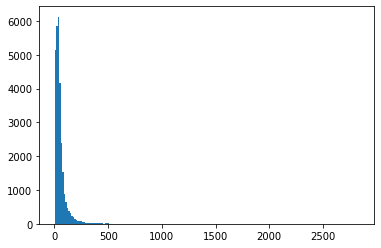

In [69]:
import matplotlib.pyplot as plt
plt.hist(papers['Number_Citations'],bins=200)
plt.show()

In [73]:
meta.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [78]:
papers['Citations'][9]

[('Acute Respiratory Syndrome in China', 2003),
 ('Acute Respiratory Syndrome in China-Update 2', 2003),
 ('Severe Acute Respiratory Syndrome (SARS)-Multi-country Outbreak', 2003),
 ('Severe Acute Respiratory Syndrome (SARS)-Multi-country Outbreak-Update',
  2003),
 ('Identification of severe acute respiratory syndrome in Canada', 2003),
 ('Investigation of a nosocomial outbreak of severe acute respiratory syndrome (SARS) in Toronto, Canada',
  2003),
 ('Identification and containment of an outbreak of SARS in a community hospital',
  2003),
 ('World Health Organization. Summary Table of SARS Cases by Country', 2002),
 ('Clinical evaluation of the emergency medical services (EMS) ambulance dispatch-based syndromic surveillance system',
  2003)]

In [79]:
papers.head()

,Library,ID,Titles,Authors,Abstract,Text,Citations,Number_Citations,Language
0,custom_license,ab680d5dbc4f51252da3473109a7885dd6b5eb6f,Evolutionary Medicine IV. Evolution and Emerge...,[S Scarpino],NaN,The evolutionary history of humans is characte...,[(Rapid evolutionary dynamics and disease thre...,63,en
1,custom_license,6599ebbef3d868afac9daa4f80fa075675cf03bc,International aviation emissions to 2025: Can ...,"[Andrew Macintosh, Lailey Wallace]","[International aviation is growing rapidly, re...","Sixty years ago, civil aviation was an infant ...",[(CONSAVE 2050-constrained scenarios on aviati...,24,en
2,custom_license,eb5c7f3ff921ad6469b79cc8a3c122648204ece4,2 Mechanisms of diarrhoea,"[I Booth, A Mcneish Baillikre&apos;]",NaN,Acute infections of the gastrointestinal tract...,[(A typing scheme for Aeromonas hydrophila bas...,91,en
3,custom_license,b87b790c96c75faa22a085cb560f7b3d8e018b24,Features of Host Cells: Cellular and Molecular...,[],NaN,"There are three domains of life-Bacteria, Arch...",[(Epidemics to eradication: the modern history...,6,en
4,custom_license,68c0bb1989b6ca2b38da32a0d992027db39f80bc,Spring 2020 | 1 Beijing's Hard and Soft Repres...,[Victoria Tin-Bor Hui],[Hong Kong's new Police Commissioner Chris Tan...,"It is also noteworthy that Tang, who was once ...",[(Listed companies appoint mainlanders to boar...,63,en


In [80]:
papers.to_csv("covid19_papers_compiled.csv")

In [87]:
import pickle
with open("covid_authors_list.txt", "wb") as fp:   #Pickling
    pickle.dump(list(papers['Authors']), fp)
    
with open("covid_citations_list.txt", "wb") as fp:   #Pickling
    pickle.dump(list(papers['Citations']), fp)

In [84]:
with open("covid_authors_list.txt", "rb") as fp:   #Pickling
    b = pickle.load(fp)

In [86]:
del b